<a href="https://colab.research.google.com/github/isabelapt/Bootcamp_Data_Science_Alura/blob/main/Modulo_1/Modulo1Aula4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ANALISANDO DADOS DA SAÚDE COM PYTHON E PANDAS**

# Aula 4: Análise de Gráficos e Criação de Hipóteses

Importando todas as bibliotecas necessárias

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [18]:
URL = "https://raw.githubusercontent.com/isabelapt/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv"
dados = pd.read_csv(URL, encoding="ISO-8859-1", skiprows = 3, skipfooter=13, sep=";",                     
                    thousands=".", decimal=",", engine='python')

# A média retorna somente os valores para as colunas que tem todas as linhas preenchidas
# Index é imutável
# Para inserir mais uma coluna em colunas preenchidas tem que transformar para lista : .tolist()
colunas_preenchidas = dados.mean().index.tolist()

# Inserir, na posição 0, ou seja, no começo do dataset (para facilitar),
# o valor “Unidade da Federação”.
colunas_preenchidas.insert(0,"Unidade da Federação")

# Fazer slice no dataFrame usando só as colunas_preenchidas
dados_usaveis = dados[colunas_preenchidas]

# Mudar o index para ser a coluna "Unidade da Federação"
# O set_index retorna um valor novo que tem que ser reatribuido
dados_usaveis = dados_usaveis.set_index("Unidade da Federação")

ordenado_por_total = dados_usaveis.sort_values("Total", ascending=False) 
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.023565e+09,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,1.754166e+08,1.795250e+08,1.798981e+08,1.800822e+08,1.916852e+08,1.905397e+08,1.770864e+08,1.923216e+08,1.785964e+08,2.169516e+08,2.150530e+08,2.128902e+08,2.126709e+08,2.140412e+08,2.152125e+08,2.141354e+08,2.160566e+08,2.089739e+08,1.921271e+08,2.134679e+08,1.957848e+08,2.393239e+08,2.211730e+08,2.317775e+08,2.239338e+08,2.240679e+08,2.480101e+08,2.240530e+08,2.389355e+08,2.254841e+08,...,2.634718e+08,2.921134e+08,2.743011e+08,2.835346e+08,3.005937e+08,2.672972e+08,2.871148e+08,2.671132e+08,2.594517e+08,2.794976e+08,2.540046e+08,2.852706e+08,2.861920e+08,2.914409e+08,2.789260e+08,2.858519e+08,2.954193e+08,2.775762e+08,3.014549e+08,2.781143e+08,2.662398e+08,2.910814e+08,2.676625e+08,2.855763e+08,2.925848e+08,3.089256e+08,2.814051e+08,3.066340e+08,3.023673e+08,2.936857e+08,3.033825e+08,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.960865e+07,8.220022e+07,8.037412e+07,8.240015e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002407e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.896806e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008298e+08,1.054856e+08,9.966612e+07,1.033570e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,...,1.367151e+08,1.534121e+08,1.442914e+08,1.475335e+08,1.560556e+08,1.422851e+08,1.483061e+08,1.423239e+08,1.383412e+08,1.465016e+08,1.307021e+08,1.514962e+08,1.506876e+08,1.535893e+08,1.502518e+08,1.566340e+08,1.604200e+08,1.459410e+08,1.572476e+08,1.481728e+08,1.453872e+08,1.531773e+08,1.426692e+08,1.519436e+08,1.579226e+08,1.635915e+08,1.541148e+08,1.667357e+08,1.617078e+08,1.574197e+08,1.661338e+08,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,5.781620e+07,6.038159e+07,5.723910e+07,6.907049e+07,6.405468e+07,6.868554e+07,6.793123e+07,7.095876e+07,6.922578e+07,6.784997e+07,6.855821e+07,6.715850e+07,6.309427e+07,6.690264e+07,6.450113e+07,7.713887e+07,7.075540e+07,7.345676e+07,7.183902e+07,7.301383e+07,7.615101e+07,7.424096e+07,7.304239e+07,7.636475e+07,...,1.060277e+08,1.205353e+08,1.117253e+08,1.185902e+08,1.221228e+08,1.106561e+08,1.175677e+08,1.124575e+08,1.055581e+08,1.161332e+08,1.070760e+08,1.223314e+08,1.247313e+08,1.270739e+08,1.226169e+08,1.279919e+08,1.312572e+08,1.206474e+08,1.295302e+08,1.218107e+08,1.129846e+08,1.241592e+08,1.177155e+08,1.239074e+08,1.274470e+08,1.325766e+08,1.248583e+08,1.346213e+08,1.271741e+08,1.261727e+08,1.338480e+08,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07
43 Rio Grande do Sul,10492

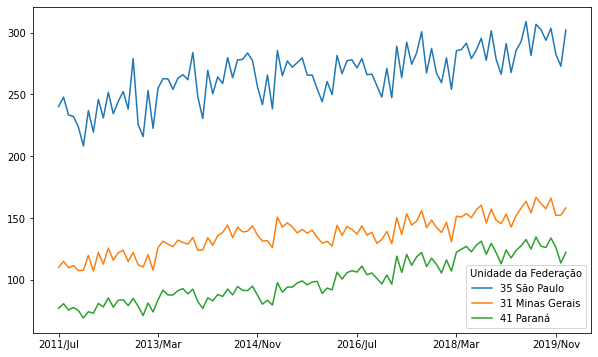

In [19]:
ordenado_por_total = ordenado_por_total/1000000
meses_filtrados = ordenado_por_total.columns[47:150]
ordenado_por_total[meses_filtrados].head(3).T.plot(figsize=(10,6))
plt.show()

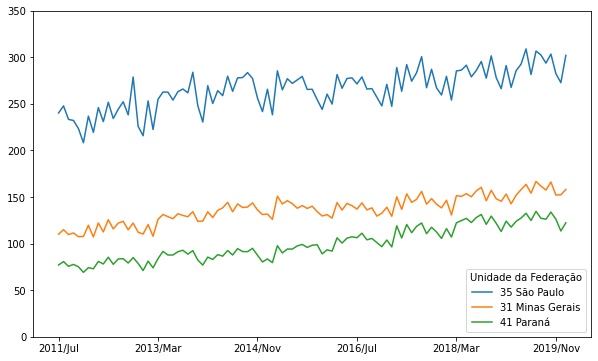

In [20]:
ordenado_por_total[meses_filtrados].head(3).T.plot(figsize=(10,6))
plt.ylim(0,350)
plt.show()

# DESAFIO 1

Refaça as manipulações feitas em aulas e gaste um tempo analisando os dados e entendendo os efeitos das manipulações

In [24]:
dict_regiões = {'1' : 'Norte',
                '2' : 'Nordeste',
                '3' : 'Sudeste',
                '4' : 'Sul',
                '5' : 'Centro-Oeste'}
regiao = [dict_regiões[id[0]] for id in dados_usaveis.index]

# Insert the data as the last column
dados_usaveis["Região"] = regiao

# Move Região Column to the be the first one
col = dados_usaveis.pop("Região")
dados_usaveis.insert(0,col.name, col)
dados_usaveis.head()

,Região,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,Norte,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,9.291297e+08
12 Acre,Norte,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,4.206680e+08
13 Amazonas,Norte,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1.771655e+09
14 Roraima,Norte,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,273

**Summing the total expenses by region**

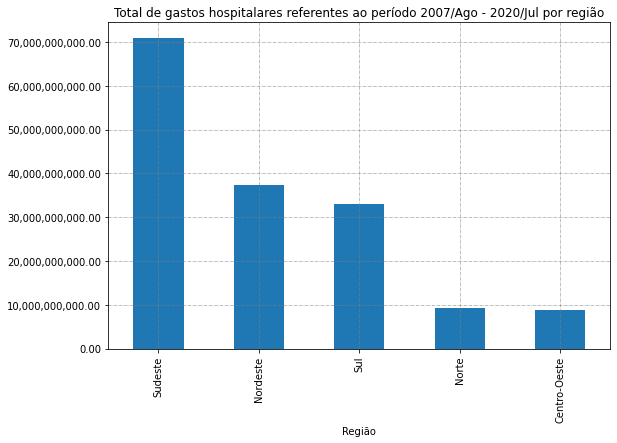

In [34]:
grouped_regiao = dados_usaveis.groupby('Região')['Total'].sum()
grouped_regiao_sorted = grouped_regiao.sort_values(ascending=False) 

ax = grouped_regiao_sorted.plot(figsize=(9,6), kind ='bar')

# Draw grid lines with red color and dashed style
plt.grid(color='gray', linestyle='-.', linewidth=0.5)

# Muda o formato dos números mostrados no eixo y 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Total de gastos hospitalares referentes ao período 2007/Ago - 2020/Jul por região")
plt.show()

# DESAFIO 2

Reflita sobre os problemas na manipulação de dados e discuta esse assunto no Discord.

Normalization of total expenses by região, to Norte 

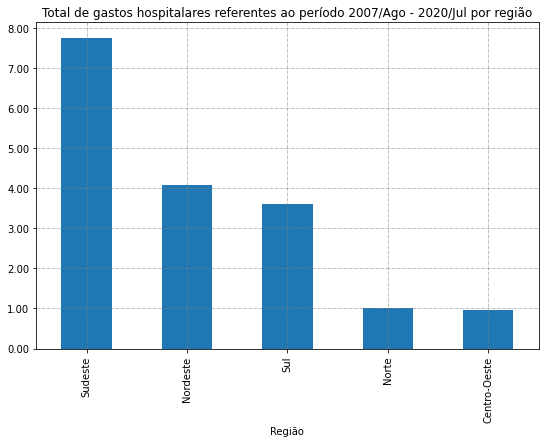

In [36]:
grouped_regiao_sorted = grouped_regiao_sorted/grouped_regiao_sorted["Norte"]

ax = grouped_regiao_sorted.plot(figsize=(9,6), kind ='bar')

# Draw grid lines with red color and dashed style
plt.grid(color='gray', linestyle='-.', linewidth=0.5)

# Muda o formato dos números mostrados no eixo y 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Total de gastos hospitalares referentes ao período 2007/Ago - 2020/Jul por região")
plt.show()

From the graphs above, I can infer that the hospital expenses is propably related to the estimated population in each region. For highly populated regions, the expenses are higher than the less populated regions.